<h1 style="color:blue;text-align:center">  Correlation & Regression </h1>

<h3 style="color:black;text-align:center"> 賴志宏 Chi-Hung Lai    <br /> <br />
created date: 2019.05.07, &emsp;  Last modified date: 2022.06.02

<h2 style="color:blue">  Content </h2>
<pre>
1. Correlation  
 1.1 Relationship between variables   
 1.2 Covariance & Pearson correlation coefficient  
2. Simple regression  
 2.1 Introduction  
 2.2 Linear regression line  
 2.3 Linear regression in Sklearn  
 2.4 numpy.ployfit( ) & numpy.poly1d( )  
3. Nonlinear regression  
 3.1 Introduction  
 3.2 Polynomial regression  
4. Linear Multiple Regression  
 4.1 Introduction  
 4.2 Dataset  
 4.3 Training & testing data
5. Accuracy & Performance  


<h1 style="color:blue"> 1. Correlation

## 1.1 Relationship between variables

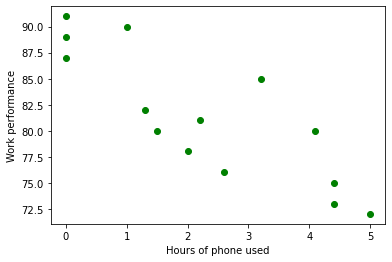

In [2]:
# hours of phone used & work performance

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

hours_phone_used = [0,0,0,1,1.3,1.5,2,2.2,2.6,3.2,4.1,4.4,4.4,5]
work_performance = [87,89,91,90,82,80,78,81,76,85,80,75,73,72]

x = np.array(hours_phone_used)
y = np.array(work_performance)

plt.xlabel("Hours of phone used")
plt.ylabel("Work performance")

plt.plot(x, y, 'go')
plt.show()

    hours_phone_used  work_performance
0                0.0                87
1                0.0                89
2                0.0                91
3                1.0                90
4                1.3                82
5                1.5                80
6                2.0                78
7                2.2                81
8                2.6                76
9                3.2                85
10               4.1                80
11               4.4                75
12               4.4                73
13               5.0                72


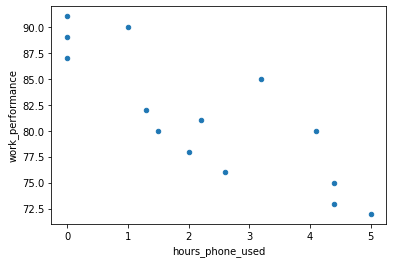

In [ ]:
# plot by pandas.plot( )

import pandas as pd

hours_phone_used = [0,0,0,1,1.3,1.5,2,2.2,2.6,3.2,4.1,4.4,4.4,5]
work_performance = [87,89,91,90,82,80,78,81,76,85,80,75,73,72]

df = pd.DataFrame({"hours_phone_used":hours_phone_used,
                   "work_performance":work_performance})

df.plot(kind="scatter", x="hours_phone_used", y="work_performance")

print(df)

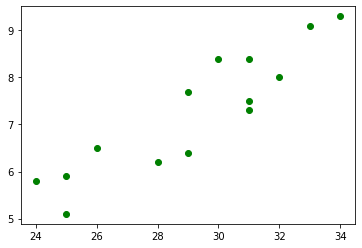

In [2]:
import numpy as np
x = np.array([29, 28, 34, 31,
                         25, 29, 32, 31,
                         24, 33, 25, 31,
                         26, 30])
y = np.array([7.7, 6.2, 9.3, 8.4,
                        5.9, 6.4, 8.0, 7.5,
                        5.8, 9.1, 5.1, 7.3,
                        6.5, 8.4])

import matplotlib.pyplot as plt
plt.plot(x, y, 'go')
plt.show()

### Correlation

- Positive correlation
    - The y values tend to increase as the x values increase. 
    - Strong positive correlation
        - When large values of one feature correspond to large values of the other, and vice versa.

- Negative correlation
    - The y values tend to decrease as the x values increase.
    - Strong negative correlation
        - When large values of one feature correspond to small values of the other, and vice versa.

- Weak or no correlation
    - When an association between two features is not obvious or is hardly observable.



- Figures
    - https://realpython.com/numpy-scipy-pandas-correlation-python/

## 1.2 How to calculate the correlation: Covariance & Pearson correlation coefficient

- Covariance
- Pearson Correlation Coefficient

### Covariance 

- used to understand the relationship between 2 or more different columns from a dataset.
    - https://medium.com/analytics-vidhya/covariance-vs-pearson-correlation-coefficient-vs-spearmans-rank-correlation-coefficient-1d2d8789a728
- covariance is only useful to find the direction of the relationship between two variables and not the magnitude.    
    
- Formula
    - https://www.mygreatlearning.com/blog/covariance-vs-correlation/#what-is-covariance
    
- Meaning
    - A positive covariance
        - the two variables at hand are positively related, and they move in the same direction. 

    - A negative covariance
        - the variables are inversely related, or that they move in opposite directions. 
    
    - Zero
        - the variables are no related.

- Disadvantage
    - only tell us whether a particular column is positively or negatively proportional to other, but it fails to tell us how much positively or negatively proportional.

In [7]:
import numpy as np

hours_phone_used = [0,0,0,1,1.3,1.5,2,2.2,2.6,3.2,4.1,4.4,4.4,5]
work_performance = [87,89,91,90,82,80,78,81,76,85,80,75,73,72]

x = np.array(hours_phone_used)
y = np.array(work_performance)
n = len(x)
x_mean = x.mean()
y_mean = y.mean()
print("number of data:", n)
print("x mean:", x_mean)
print("y mean:", y_mean)

diff = (x-x_mean)*(y-y_mean)
print("Sum of x and y differences:", diff.sum())
covar = diff.sum()/n
print("Covariance:", covar)

number of data: 14
x mean: 2.264285714285714
y mean: 81.35714285714286
Sum of x and y differences: -119.42142857142856
Covariance: -8.530102040816326


### Pearson Correlation Coefficient 

- or Called "Pearson Product Moment Correlation Coefficient"

- It does not only gives us whether the relationship between 2 variables is positive or neagative, but also gives us how much proportional it is.

- Range of pearson correlation coefficient is -1 <= ρ <= 1

- Formula
    - https://www.mygreatlearning.com/blog/covariance-vs-correlation/#what-is-correlation

### Correlation Coefficient

<br />
<img src = "images/relation_coefficient.jpg" width = "150" height = "80" align="left"> <br /> <br /> <br /> <br />
<img src = "images/r_fomula.png" width = "200" height = "100" align="left"> 註：分子與分母共同除以n
<br /> <br /> <br /> <br /> <br /> <br />
* 母體的相關係數，常用希臘小寫字母 ρ (rho) 作為代表符號
<br />
<img src = "images/population_r.png" width = "300" height = "150" align="left">



In [6]:
# Calculate by Formula

import numpy as np
import pandas as pd

hours_phone_used = [0,0,0,1,1.3,1.5,2,2.2,2.6,3.2,4.1,4.4,4.4,5]
work_performance = [87,89,91,90,82,80,78,81,76,85,80,75,73,72]

x = np.array(hours_phone_used)
y = np.array(work_performance)
n = len(x)
x_mean = x.mean()
y_mean = y.mean()

diff = (x-x_mean)*(y-y_mean)
covar = diff.sum()/n
print("Covariance:", covar)

corr = covar/(x.std()*y.std())
print("Correlation:", corr)


Covariance: -8.530102040816326
Correlation: -0.8384124440330989


### pandas.DataFrame.corr( )

- https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.corr.html

In [5]:
# corr( ) in Pandas DataFrames

df = pd.DataFrame({"hours_phone_used":hours_phone_used,
                   "work_performance":work_performance})
print(df.corr())   #


                  hours_phone_used  work_performance
hours_phone_used          1.000000         -0.838412
work_performance         -0.838412          1.000000


### numpy.corrcoef( )

- https://numpy.org/doc/stable/reference/generated/numpy.corrcoef.html

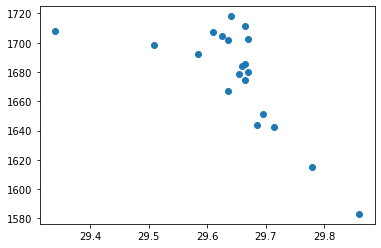

[[ 1.         -0.70533216]
 [-0.70533216  1.        ]]


In [9]:
# corrcoef( ) in numpy

import numpy as np
import matplotlib.pyplot as plt

usd = np.array([29.86, 29.78, 29.695, 29.715, 29.685,
                29.665, 29.67, 29.635, 29.625, 29.665,
                29.665, 29.635, 29.66, 29.655, 29.67,
                29.64, 29.61, 29.585, 29.51, 29.34])

gold = np.array([1583.1, 1615, 1651.35, 1642.8, 1643.8,
                 1674.75, 1680.25, 1701.65, 1704.65, 1711.1,
                 1685.2, 1667.3, 1684, 1678.75, 1702.65,
                 1718.1, 1707.1, 1692.2, 1698.65, 1708.1])

plt.scatter(usd, gold)
plt.show()

print(np.corrcoef(usd, gold))

### Correlation test

#### scipy.stats.pearsonr(x, y)

- Pearson correlation coefficient and p-value for testing non-correlation.

- Returns
    - r
        - Pearson’s correlation coefficient.

    - p-value
        - Two-tailed p-value.
        
        
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html
- https://www.statology.org/correlation-test-in-python/

In [11]:
from scipy.stats.stats import pearsonr

#calculation correlation coefficient and p-value between x and y
print(pearsonr(usd, gold))


(-0.7053321625961779, 0.0005132072609901877)


### Hint:
- Correlation is a statistical measure (expressed as a number) that describes the size and direction of a relationship between two or more variables. 
    - A correlation between variables, however, does not automatically mean that the change in one variable is the cause of the change in the values of the other variable.

- Causation indicates that one event is the result of the occurrence of the other event;  
    - i.e. there is a causal relationship between the two events. This is also referred to as cause and effect.

# 2. Simple regression

## 2.1 Introduction

- Linear regression analysis is used to predict the value of a variable based on the value of another variable. 
- The variable you want to predict is called the dependent variable. 
- The variable you are using to predict the other variable's value is called the independent variable.

- https://www.ibm.com/topics/linear-regression

### Why linear regression is important?

- Linear-regression models are relatively simple and provide an easy-to-interpret mathematical formula that can generate predictions. 
- Linear regression can be applied to various areas in business and academic study.

## 2.2 Linear regression line

### The Least Squares Regression Line

- Given any collection of pairs of numbers (except when all the x-values are the same) and the corresponding scatter diagram, there always exists exactly one straight line that fits the data better than any other, in the sense of minimizing the sum of the squared errors.


- Given a collection of pairs (x,y) of numbers (in which not all the x-values are the same), there is a line y=bx+a that best fits the data in the sense of minimizing the sum of the squared errors.

- see the figure
    - https://saylordotorg.github.io/text_introductory-statistics/s14-04-the-least-squares-regression-l.html

. Get a line s that the sum of the squared errors is minimized.

<img src = "images/regression_line.png" width = 300 height = 100>

- A linear regression line has an equation of the form Y = a + bX, where X is the explanatory variable and Y is the dependent variable. 

- The slope of the line is b, and a is the intercept (the value of y when x = 0).

<img src = "images/intercept_formula.png" width = 300 height = 100>

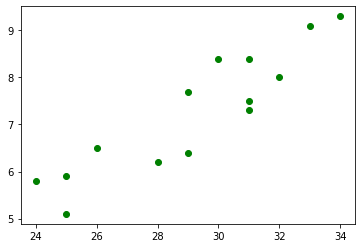

In [ ]:
import numpy as np
x = np.array([29, 28, 34, 31,
                         25, 29, 32, 31,
                         24, 33, 25, 31,
                         26, 30])
y = np.array([7.7, 6.2, 9.3, 8.4,
                        5.9, 6.4, 8.0, 7.5,
                        5.8, 9.1, 5.1, 7.3,
                        6.5, 8.4])


import matplotlib.pyplot as plt
plt.plot(x, y, 'go')
plt.show()

Covariance: 3.463265306122449
Slope（regression coefficient）： 0.37378854625550667
Intercept: -3.6361233480176223
Regression line：Y= 0.37378854625550667X + -3.6361233480176223


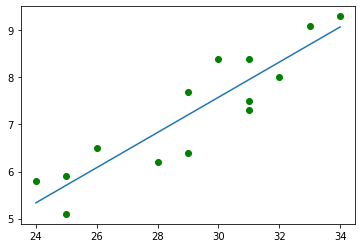

In [61]:
# Calculate coeficients a and b by formula
# Temperature and sales of ice cream store

import numpy as np
x = np.array([29, 28, 34, 31,
                         25, 29, 32, 31,
                         24, 33, 25, 31,
                         26, 30])
y = np.array([7.7, 6.2, 9.3, 8.4,
                        5.9, 6.4, 8.0, 7.5,
                        5.8, 9.1, 5.1, 7.3,
                        6.5, 8.4])
n = len(x)
x_mean = x.mean()
y_mean = y.mean()

diff = (x-x_mean)*(y-y_mean)
covar = diff.sum()/n
print("Covariance:", covar)

b= covar/(x.std()** 2)
print("Slope（regression coefficient）：", b)

intercept = y_mean - b * x_mean
print("Intercept:", intercept)

print("Regression line：Y= {}X + {}".format(b, intercept) )

import matplotlib.pyplot as plt
x_new = np.linspace(x.min(), x.max(), 100)
y_new  = b * x_new + intercept

plt.plot(x, y, 'go')
plt.plot(x_new, y_new)
plt.show()

### the sum of the squared errors

In [67]:
# calculate residual (the sum of the squared errors)
predicted_y  = b * x + intercept
print(y)
print()
print(predicted_y)
print()
print((predicted_y - y))
print()
print((predicted_y - y)**2)
print()
print('the sum of the squared errors:')
print(sum((predicted_y - y)**2))

[7.7 6.2 9.3 8.4 5.9 6.4 8.  7.5 5.8 9.1 5.1 7.3 6.5 8.4]

[7.20374449 6.82995595 9.07268722 7.95132159 5.70859031 7.20374449
 8.32511013 7.95132159 5.33480176 8.69889868 5.70859031 7.95132159
 6.08237885 7.57753304]

[-0.49625551  0.62995595 -0.22731278 -0.44867841 -0.19140969  0.80374449
  0.32511013  0.45132159 -0.46519824 -0.40110132  0.60859031  0.65132159
 -0.41762115 -0.82246696]

[0.24626953 0.3968445  0.0516711  0.20131232 0.03663767 0.64600521
 0.1056966  0.20369117 0.2164094  0.16088227 0.37038216 0.42421981
 0.17440742 0.6764519 ]

the sum of the squared errors:
3.9108810572687256


Regression line：Y= 0.37378854625550667X + -3.6361233480176223

28 of y_predict: 6.829955947136564

[26, 30] of y_predict: [6.08237885 7.57753304]


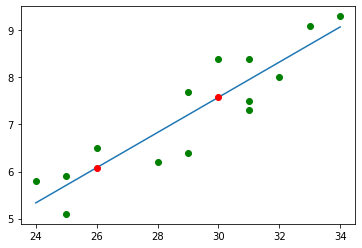

In [20]:
# prediction by temperature


print("Regression line：Y= {}X + {}".format(b, intercept) )

x1 = 28
y_predict = b * x1 + intercept
print('\n28 of y_predict:', y_predict)


x1 = np.array([26, 30])
y_predict = b * x1 + intercept
print('\n[26, 30] of y_predict:', y_predict)

import matplotlib.pyplot as plt
x_new = np.linspace(x.min(), x.max(), 100)
y_new  = b * x_new + intercept
# plt.plot(x, y, 'go', x_new, y_new)
plt.plot(x, y, 'go')
plt.plot(x_new, y_new)
plt.plot(x1, y_predict, 'ro')
plt.show()

## 2.3 Linear regression in Sklearn

### Steps

1. intall sklearn package (Anaconda embeded）
 * pip install sklearn
2. import module
 * from sklearn.linear_model import LinearRegression
3. assign X and y
 * X must be 2-D
 * y must be 1-D
4. assign regression object
 * lm = LinearRegression()
5. train model
 * lm.fit(X, y)
6. Get regression coefficient & intercept
 * lm.coef_
 * lm.intercept_
7. predict
 * lm.predict(X)
 * must be 2-D
     * [[50]]
     * [[26], [30]]
     * np.array([[26], [30]])
     * pd.DataFrame(np.array([26, 30]))

In [27]:
# Temperature and sales of ice cream store
# use object: LinearRegression

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

temperatures = np.array([29, 28, 34, 31,
                         25, 29, 32, 31,
                         24, 33, 25, 31,
                         26, 30])
drink_sales = np.array([7.7, 6.2, 9.3, 8.4,
                        5.9, 6.4, 8.0, 7.5,
                        5.8, 9.1, 5.1, 7.3,
                        6.5, 8.4])
X = pd.DataFrame(temperatures, columns=["Temperature"])
y = pd.Series(drink_sales)   # can be replaced by the following 2 lines

# target = pd.DataFrame(drink_sales, columns=["Drink_Sales"])
# y = target["Drink_Sales"]

lm = LinearRegression()
lm.fit(X, y)    # train predict model
print("Slope（regression coefficient）:", lm.coef_)
print("Intercept:", lm.intercept_)

# prediction
predicted_sales1 = lm.predict([[26]])
print(predicted_sales1)

# prediction
new_temperatures = pd.DataFrame(np.array([26, 30]))
predicted_sales2 = lm.predict(new_temperatures)
print(predicted_sales2)


Slope（regression coefficient）: [0.37378855]
Intercept: -3.6361233480176187
[6.08237885]
[6.08237885 7.57753304]


[6.08237885 7.57753304]
[[26]
 [30]]


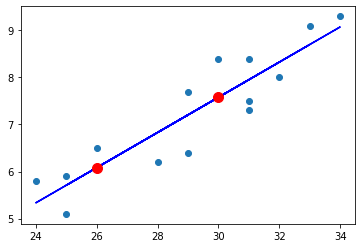

In [37]:
X = pd.DataFrame(temperatures, columns=["Temperature"])
target = pd.DataFrame(drink_sales, columns=["Drink_Sales"])
y = target["Drink_Sales"]
lm = LinearRegression()
lm.fit(X, y)

new_temperatures = np.array([[26], [30]])
predicted_sales = lm.predict(new_temperatures)
print(predicted_sales)
print(new_temperatures)

plt.scatter(temperatures, drink_sales) 
regression_sales = lm.predict(X)
plt.plot(temperatures, regression_sales, color="blue")
plt.plot(new_temperatures, predicted_sales, "ro", markersize=10)
plt.plot(x1, y_predict, 'ro')
plt.show()

regression coefficient: [0.62513172]
intercept: -48.60353530031602
[45.16622234 51.41753952 57.66885669]


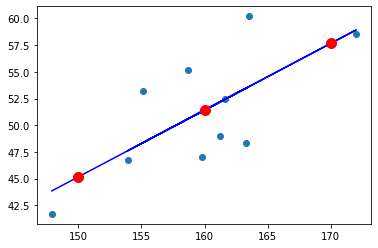

In [40]:
# predict weight by height

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

heights = np.array([147.9, 163.5, 159.8, 155.1,
                    163.3, 158.7, 172.0, 161.2,
                    153.9, 161.6])
weights = np.array([41.7, 60.2, 47.0, 53.2,
                    48.3, 55.2, 58.5, 49.0,
                    46.7, 52.5])
X = pd.DataFrame(heights, columns=["Height"])
target = pd.DataFrame(weights, columns=["Weight"])  
y = target["Weight"]       # OR y = pd.Series(weights)
lm = LinearRegression()
lm.fit(X, y)                # OR lm.fit(x, weights)
print("regression coefficient:", lm.coef_)
print("intercept:", lm.intercept_ )

# predict weight by height 150, 160, 170
new_heights = np.array([[150], [160], [170]])
predicted_weights = lm.predict(new_heights)
print(predicted_weights)

plt.scatter(heights, weights)  
regression_weights = lm.predict(X)
plt.plot(heights, regression_weights, color="blue")   
plt.plot(new_heights, predicted_weights, 'ro', markersize=10)
plt.show()  

## 2.4 numpy.ployfit( ) & numpy.poly1d( )

### Syntax
- numpy.ma.polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    - Least squares polynomial fit.
    - deg = 1
        - linear regression

- Fit a polynomial p(x) = p[0] * x**deg + ... + p[deg] of degree deg to points (x, y). 
- Returns a vector of coefficients p that minimises the squared error (residuals).
- Also returns residuals if "full" is True


- https://het.as.utexas.edu/HET/Software/Numpy/reference/generated/numpy.ma.polyfit.html

z: [-3.02086909 88.19725359]
intercept is: 88.19725359111037
regression coefficient is: -3.0208690938657647
Linear regression is: -3.0208690938657647x + 88.19725359111037


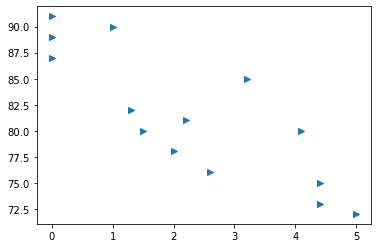

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
hours_phone_used = [0,0,0,1,1.3,1.5,2,2.2,2.6,3.2,4.1,4.4,4.4,5]
work_performance = [87,89,91,90,82,80,78,81,76,85,80,75,73,72]

plt.scatter(hours_phone_used, work_performance, marker = '>')
z = np.polyfit(hours_phone_used, work_performance, 1)
print('z:', z)
print('intercept is:', z[1] )
print('regression coefficient is:', z[0] )
print('Linear regression is:', str(z[0])+'x + '+ str(z[1]))


z: [-3.02086909 88.19725359]
residuals: [152.457783]


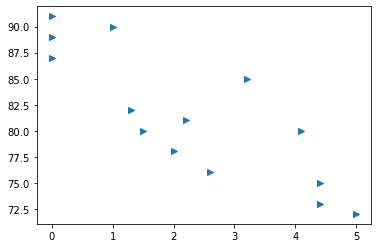

In [48]:
# Also returns residuals if "full" is True

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
hours_phone_used = [0,0,0,1,1.3,1.5,2,2.2,2.6,3.2,4.1,4.4,4.4,5]
work_performance = [87,89,91,90,82,80,78,81,76,85,80,75,73,72]

plt.scatter(hours_phone_used, work_performance, marker = '>')
z, res, _, _, _= np.polyfit(hours_phone_used, work_performance, 1, full = True)

print('z:', z)

print('residuals:', res)

### numpy.poly1d( )

#### A one-dimensional polynomial class

- poly1d([1, 2, 3])
    - x <sup> 2 </sup> + 2x  + 3
- poly1d([1, 2, 3], True) 
    - (x-1)(x-2)(x-3) = x <sup> 3 </sup> - 6x  <sup> 2 </sup> + 11x - 6
    
    
- https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html

z: [-3.02086909 88.19725359]
p:  
-3.021 x + 88.2


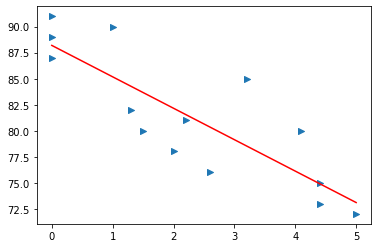

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
hours_phone_used = [0,0,0,1,1.3,1.5,2,2.2,2.6,3.2,4.1,4.4,4.4,5]
work_performance = [87,89,91,90,82,80,78,81,76,85,80,75,73,72]

plt.scatter(hours_phone_used, work_performance, marker = '>')
z = np.polyfit(hours_phone_used, work_performance, 1)
p = np.poly1d(z)
print('z:', z)
print('p:', p)

xp = np.linspace(min(hours_phone_used), max(hours_phone_used), 100)
plt.plot(hours_phone_used, p(hours_phone_used), c='r')
plt.show()

z: [-3.02086909 88.19725359]
p:  
-3.021 x + 88.2
residuals: [152.457783]
predicted y vaules: [82.1555154  79.13464631 76.11377722]


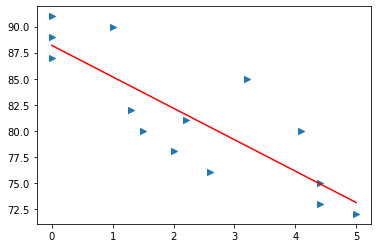

In [68]:
# calculate the squared error (residuals)

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
hours_phone_used = [0,0,0,1,1.3,1.5,2,2.2,2.6,3.2,4.1,4.4,4.4,5]
work_performance = [87,89,91,90,82,80,78,81,76,85,80,75,73,72]

plt.scatter(hours_phone_used, work_performance, marker = '>')
z, res, _, _, _= np.polyfit(hours_phone_used, work_performance, 1, full = True)
p = np.poly1d(z)
print('z:', z)
print('p:', p)
print('residuals:', res)
x_predict = [2, 3, 4]
print('predicted y vaules:', p(x_predict))

xp = np.linspace(min(hours_phone_used), max(hours_phone_used), 100)
plt.plot(xp, p(xp), c='r')
plt.show()

z: [-3.02086909 88.19725359]
p:  
-3.021 x + 88.2
residuals: [152.457783]
[1.43341616e+00 6.44401797e-01 7.85538743e+00 2.32672665e+01
 5.15346193e+00 1.34391890e+01 1.72683083e+01 3.03977543e-01
 1.88615964e+01 4.18547862e+01 1.75419381e+01 8.94356470e-03
 3.63066188e+00 1.19444816e+00]
152.45778299756088


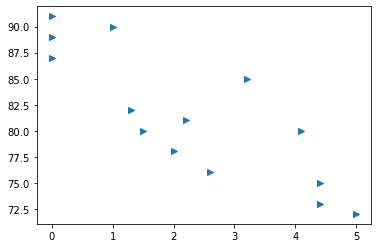

In [54]:
# Compare the squared error (residuals) between calculation by formula and by np.polyfit() method

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
hours_phone_used = [0,0,0,1,1.3,1.5,2,2.2,2.6,3.2,4.1,4.4,4.4,5]
work_performance = [87,89,91,90,82,80,78,81,76,85,80,75,73,72]

plt.scatter(hours_phone_used, work_performance, marker = '>')
z, res, _, _, _= np.polyfit(hours_phone_used, work_performance, 1, full = True)
p = np.poly1d(z)
print('z:', z)
print('p:', p)
print('residuals:', res)

# calculate residual (the sum of the squared errors)
print(sum((p(hours_phone_used) - work_performance)**2))

# 3. Nonlinear regression

## 3.1 Introduction

- Non-linear regressions are a relationship between independent variables  𝑥  and a dependent variable  𝑦  which result in a non-linear function modeled data. 

- Any relationship that is not linear can be termed as non-linear, and is usually represented by the polynomial of  𝑘  degrees 
    - maximum power of  𝑥

     - 𝑦=𝑎𝑥<sup>3</sup>+𝑏𝑥<sup>2</sup>+𝑐𝑥+𝑑 
 
- Non-linear functions can have elements like exponentials, logarithms, fractions, and others. For example:
    - 𝑦=log(𝑥)
 
- Or even, more complicated such as :
    - 𝑦=log(𝑎𝑥3+𝑏𝑥2+𝑐𝑥+𝑑)
    
    

- https://codekarim.com/node/40

z1: [4.60102386e-03 5.11434429e+00]
p1:  
0.004601 x + 5.114
residuals: [19.32906299]
predict y vaules: [6.49465145 6.95475384 7.41485623]

z2: [-2.89074067e-05  2.84345671e-02  1.98259641e+00]
p2:
             2
-2.891e-05 x + 0.02843 x + 1.983
residuals: [0.6434634]
predict y vaules: [7.91129992 8.73123815 8.97302825]


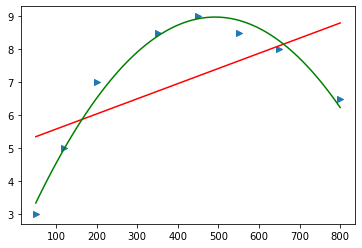

In [77]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
caffeine = [50, 120, 800, 550, 450, 350, 650, 200]
tired = [3, 5, 6.5, 8.5, 9, 8.5, 8, 7]

plt.scatter(caffeine, tired, marker = '>')
z1, res1, _, _, _= np.polyfit(caffeine, tired, 1, full = True)
p1 = np.poly1d(z1)
print('z1:', z1)
print('p1:', p1)
print('residuals:', res1)
x_predict = [300, 400, 500]
print('predict y vaules:', p1(x_predict))

xp = np.linspace(min(caffeine), max(caffeine), 100)
plt.plot(xp, p1(xp), c='r')

z2, res2, _, _, _= np.polyfit(caffeine, tired, 2, full = True)
p2 = np.poly1d(z2)
print()
print('z2:', z2)
print('p2:\n', p2)
print('residuals:', res2)

print('predict y vaules:', p2(x_predict))

plt.plot(xp, p2(xp), c='g')

plt.show()

z1: [4.60102386e-03 5.11434429e+00]
p1:  
0.004601 x + 5.114
residuals: [19.32906299]

z2: [-2.89074067e-05  2.84345671e-02  1.98259641e+00]
p2:
             2
-2.891e-05 x + 0.02843 x + 1.983
residuals: [0.6434634]

z3: [ 2.59989391e-08 -6.25270626e-05  4.01121938e-02  1.13198211e+00]
         3             2
2.6e-08 x - 6.253e-05 x + 0.04011 x + 1.132
residuals: [0.07220633]


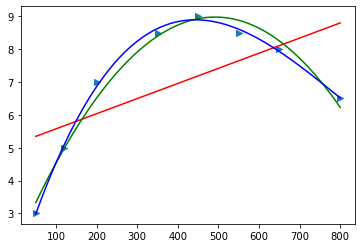

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
caffeine = [50, 120, 800, 550, 450, 350, 650, 200]
tired = [3, 5, 6.5, 8.5, 9, 8.5, 8, 7]

plt.scatter(caffeine, tired, marker = '>')
z1, res1, _, _, _= np.polyfit(caffeine, tired, 1, full = True)
p1 = np.poly1d(z1)
print('z1:', z1)
print('p1:', p1)
print('residuals:', res1)

xp = np.linspace(min(caffeine), max(caffeine), 100)
plt.plot(xp, p1(xp), c='r')

z2, res2, _, _, _= np.polyfit(caffeine, tired, 2, full = True)
p2 = np.poly1d(z2)
print()
print('z2:', z2)
print('p2:\n', p2)
print('residuals:', res2)


plt.plot(xp, p2(xp), c='g')

z3, res3, _, _, _= np.polyfit(caffeine, tired, 3, full = True)
p3 = np.poly1d(z3)
print()
print('z3:', z3)
print(p3)
print('residuals:', res3)


plt.plot(xp, p3(xp), c='b')

plt.show()

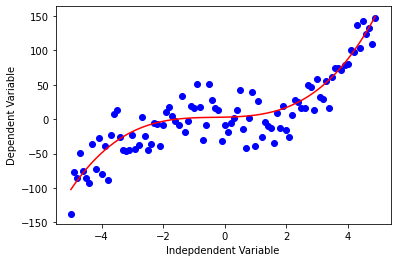

In [86]:
x = np.arange(-5.0, 5.0, 0.1)

##You can adjust the slope and intercept to verify the changes in the graph
y = 1*(x**3) + 1*(x**2) + 1*x + 3
y_noise = 20 * np.random.normal(size=x.size)
ydata = y + y_noise
plt.plot(x, ydata,  'bo')
plt.plot(x,y, 'r') 
plt.ylabel('Dependent Variable')
plt.xlabel('Indepdendent Variable')
plt.show()

## 3.2 Polynomial regression¶

- We can also use polynomial and least squares to fit a nonlinear function. 

- We have our functions all in linear form, that is, 𝑦=𝑎𝑥+𝑏. 

    - But polynomials are functions with the following form:
    ### - 𝑓(𝑥)=𝑎<sub>𝑛</sub>𝑥<sup>𝑛</sup>+𝑎<sub>𝑛−1</sub>𝑥<sup>𝑛−1</sup>+⋯+𝑎<sub>2</sub>𝑥<sup>2</sup>+𝑎<sub>1</sub>𝑥<sup>1</sup>+𝑎<sub>0
    
    
    
  
       
- https://pythonnumericalmethods.berkeley.edu/notebooks/chapter16.05-Least-Square-Regression-for-Nonlinear-Functions.html

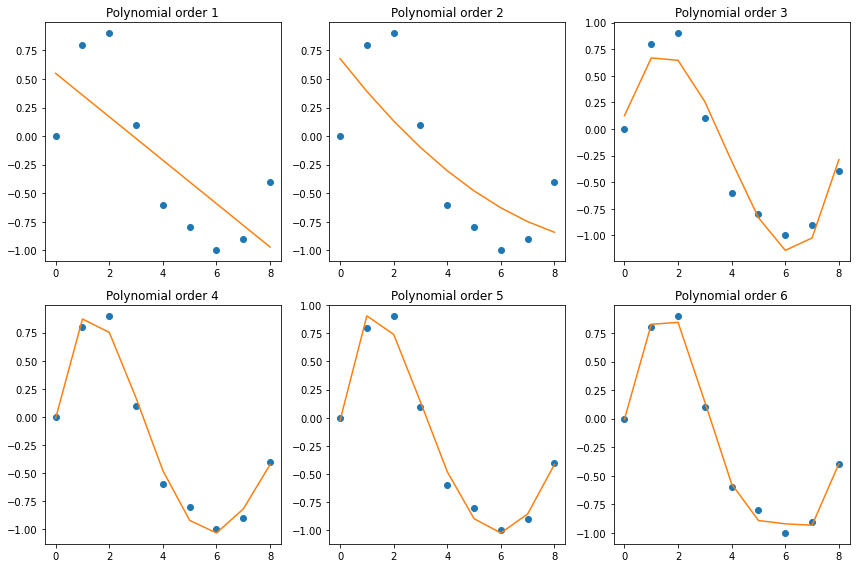

In [85]:
# https://pythonnumericalmethods.berkeley.edu/notebooks/chapter16.05-Least-Square-Regression-for-Nonlinear-Functions.html

x_d = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8])
y_d = np.array([0, 0.8, 0.9, 0.1, -0.6, -0.8, -1, -0.9, -0.4])

plt.figure(figsize = (12, 8))
for i in range(1, 7):
    
    # get the polynomial coefficients
    y_est = np.polyfit(x_d, y_d, i)
    plt.subplot(2,3,i)
    plt.plot(x_d, y_d, 'o')
    # evaluate the values for a polynomial
    plt.plot(x_d, np.polyval(y_est, x_d))
    plt.title(f'Polynomial order {i}')

plt.tight_layout()
plt.show()

## Practice

- Calculate the residuals between Polynomial regression of k degrees

# 4. Linear Multiple Regression

- Multiple indepedent variables
- one dependent variable

## 4.1 Introduction

- Multiple linear regression (MLR), also known simply as multiple regression,
- A statistical technique that uses several explanatory variables to predict the outcome of a response variable. 
- The goal of multiple linear regression is to model the linear relationship between the explanatory (independent) variables and response (dependent) variables.


- https://www.investopedia.com/terms/m/mlr.asp

### Formula and Calculation of Multiple Linear Regression

- https://www.investopedia.com/terms/m/mlr.asp

In [82]:
# Predict weight by Waist circumference and height 

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

waist_heights = np.array([[67,160], [68,165], [70,167], 
                          [65,170], [80,165], [85,167],
                          [78,178], [79,182], [95,175],
                          [89,172]])
weights = np.array([50, 60, 65, 65,
                    70, 75, 80, 85,
                    90, 81])
X = pd.DataFrame(waist_heights, columns=["Waist", "Height"])
target = pd.DataFrame(weights, columns=["Weight"])
y = target["Weight"]
lm = LinearRegression()
lm.fit(X, y)
print("Regression coeffieient:", lm.coef_)
print("intercept:", lm.intercept_ )
print()
# predict weight by [66,164],[82,172]
new_waist_heights = pd.DataFrame(np.array([[66, 164],
                                           [82, 172]]))
predicted_weights = lm.predict(new_waist_heights)
print(predicted_weights)
print()

# predict weight by [80, 170]
new_waist_heights = pd.DataFrame(np.array([[80, 170]]))
predicted_weights = lm.predict(new_waist_heights)
print(predicted_weights)


Regression coeffieient: [0.71013574 1.07794276]
intercept: -166.36459730650577

[57.28697457 77.2726885 ]

[73.6965315]


In [83]:
# Use store area and station distance to predict monthly turnover

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

area_dists = np.array([[10,80], [8,0], [8,200], 
                       [5,200], [7,300], [8,230],
                       [7,40], [9,0], [6,330],
                       [9,180]])
sales = np.array([46.9, 36.6, 37.1, 20.8,
                    24.6, 29.7, 36.6, 43.6,
                    19.8, 36.4])
X = pd.DataFrame(area_dists, columns=["Area", "Distance"])
target = pd.DataFrame(sales, columns=["Sales"])
y = target["Sales"]
lm = LinearRegression()
lm.fit(X, y)
print("Regression coefficient:", lm.coef_)
print("intercept:", lm.intercept_ )

# predict [10,100]
new_area_dists = pd.DataFrame(np.array([[10, 100]]))
predicted_sales = lm.predict(new_area_dists)
print(predicted_sales)

Regression coefficient: [ 4.12351586 -0.03452946]
intercept: 6.845523384392735
[44.62773616]


## 4.2 Dataset

### The Boston Housing Dataset

In [ ]:
# ch15_3_2 modified
# 資料庫的內容

from sklearn import datasets

boston = datasets.load_boston()      # Load other datasets: datasets.load_iris(), load_diabetes() 
# data type is dictionary
print(boston)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

* independent variables：
        - CRIM     犯罪率 per capita crime rate by town 
        - ZN       超過25,000平方呎的住宅用地區塊所佔的比例 proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    非零售業商業用地的公畝數 proportion of non-retail business acres per town
        - CHAS     河道為界值為1,否則為 0 Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      一氧化氮濃度 nitric oxides concentration (parts per 10 million)
        - RM       每戶平均房間數 average number of rooms per dwelling
        - AGE      1940 年前所建的房子，屋主自用比例 proportion of owner-occupied units built prior to 1940
        - DIS      到波士頓五個就業服務中心的加權距離 weighted distances to five Boston employment centres
        - RAD      使用高速公路方便的指數  index of accessibility to radial highways
        - TAX      總價- 房屋稅的比例 full-value property-tax rate per $10,000
        - PTRATIO  生師比 pupil-teacher ratio by town
        - B        1000*(非洲裔的比例 - 0.63)^2   1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        - LSTAT    社經地位的人口比例  % lower status of the population

* dependent variables:
        - MEDV     自用住宅的房價中位數（單位1,000美元) Median value of owner-occupied homes in $1000's

In [ ]:
from sklearn import datasets

boston = datasets.load_boston()      
# data type is dictionary
print("keys:\n", boston.keys())
print("\ndata shape:\n", boston.data.shape)
print("\nfield name in data:\n", boston.feature_names)
print("\ntarget shape:\n", boston.target.shape)
print("\nDescription:\n", boston.DESCR)

keys:
 dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

data shape:
 (506, 13)

field name in data:
 ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']

target shape:
 (506,)

Description:
 .. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occ

In [1]:
import pandas as pd
from sklearn import datasets

boston = datasets.load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
print(X.head())

target = pd.DataFrame(boston.target, columns=["MEDV"])
print('\n','target:', '\n', target.head(), sep='\n')


      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33  


target:


   MEDV
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


In [3]:
X

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [89]:
# retrieve regression coefficients

import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

boston = datasets.load_boston()

X =boston.data
y =boston.target

# Alternative way as follows:
# X = pd.DataFrame(boston.data, columns=boston.feature_names)
# target = pd.DataFrame(boston.target, columns=["MEDV"])
# y = target["MEDV"]

lm = LinearRegression()
lm.fit(X, y)
print("Regression coefficient:", lm.coef_)
print("Intercept:", lm.intercept_ )

# Alternative way as follows:
# coef = pd.DataFrame(boston.feature_names, columns=["features"])
# coef["estimatedCoefficients"] = lm.coef_
# print("\nRegression coefficient:", coef, sep = '\n')

# The bigest regression coefficient is "RM"

Regression coefficient: [-1.08011358e-01  4.64204584e-02  2.05586264e-02  2.68673382e+00
 -1.77666112e+01  3.80986521e+00  6.92224640e-04 -1.47556685e+00
  3.06049479e-01 -1.23345939e-02 -9.52747232e-01  9.31168327e-03
 -5.24758378e-01]
Intercept: 36.459488385089855


In [93]:
X0 =boston.data[:, 0]
print(boston.feature_names[0])
X0

CRIM


array([6.32000e-03, 2.73100e-02, 2.72900e-02, 3.23700e-02, 6.90500e-02,
       2.98500e-02, 8.82900e-02, 1.44550e-01, 2.11240e-01, 1.70040e-01,
       2.24890e-01, 1.17470e-01, 9.37800e-02, 6.29760e-01, 6.37960e-01,
       6.27390e-01, 1.05393e+00, 7.84200e-01, 8.02710e-01, 7.25800e-01,
       1.25179e+00, 8.52040e-01, 1.23247e+00, 9.88430e-01, 7.50260e-01,
       8.40540e-01, 6.71910e-01, 9.55770e-01, 7.72990e-01, 1.00245e+00,
       1.13081e+00, 1.35472e+00, 1.38799e+00, 1.15172e+00, 1.61282e+00,
       6.41700e-02, 9.74400e-02, 8.01400e-02, 1.75050e-01, 2.76300e-02,
       3.35900e-02, 1.27440e-01, 1.41500e-01, 1.59360e-01, 1.22690e-01,
       1.71420e-01, 1.88360e-01, 2.29270e-01, 2.53870e-01, 2.19770e-01,
       8.87300e-02, 4.33700e-02, 5.36000e-02, 4.98100e-02, 1.36000e-02,
       1.31100e-02, 2.05500e-02, 1.43200e-02, 1.54450e-01, 1.03280e-01,
       1.49320e-01, 1.71710e-01, 1.10270e-01, 1.26500e-01, 1.95100e-02,
       3.58400e-02, 4.37900e-02, 5.78900e-02, 1.35540e-01, 1.281

z1: [  9.10210898 -34.67062078]
p1:  
9.102 x - 34.67
residuals: [22061.87919621]


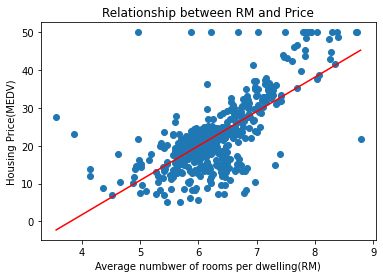

In [98]:
# The bigest regression coefficient is "RM" from above program result
# Picture of "Relationship between RM and Price"

import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

boston = datasets.load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
target = pd.DataFrame(boston.target, columns=["MEDV"])
y = target["MEDV"]

# lm = LinearRegression()
# lm.fit(X, y)

plt.scatter(X.RM, y)
plt.xlabel("Average numbwer of rooms per dwelling(RM)")
plt.ylabel("Housing Price(MEDV)")
plt.title("Relationship between RM and Price")

z1, res1, _, _, _= np.polyfit(X.RM, y, 1, full = True)
p1 = np.poly1d(z1)
print('z1:', z1)
print('p1:', p1)
print('residuals:', res1)

xp = np.linspace(min(X.RM), max(X.RM), 100)
plt.plot(xp, p1(xp), c='r')
plt.show()

In [103]:
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

boston = datasets.load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
target = pd.DataFrame(boston.target, columns=["MEDV"])
y = target["MEDV"]

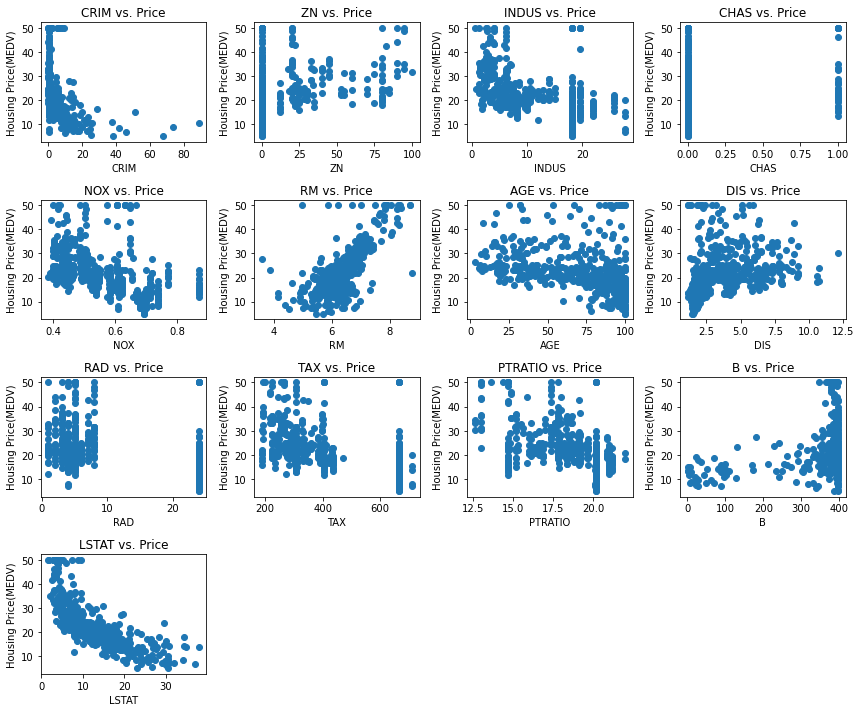

In [121]:
plt.figure(figsize = (12, 10))
for i in range(0, 13):
    
    X[i] = X[boston.feature_names[i]]
    plt.subplot(4,4,i+1)
    plt.scatter(X[i], y)
    plt.xlabel(str(boston.feature_names[i]))
    plt.ylabel("Housing Price(MEDV)")
    title = str(boston.feature_names[i]) + " vs. Price"
                                     
    plt.title(title)

plt.tight_layout()
plt.show()

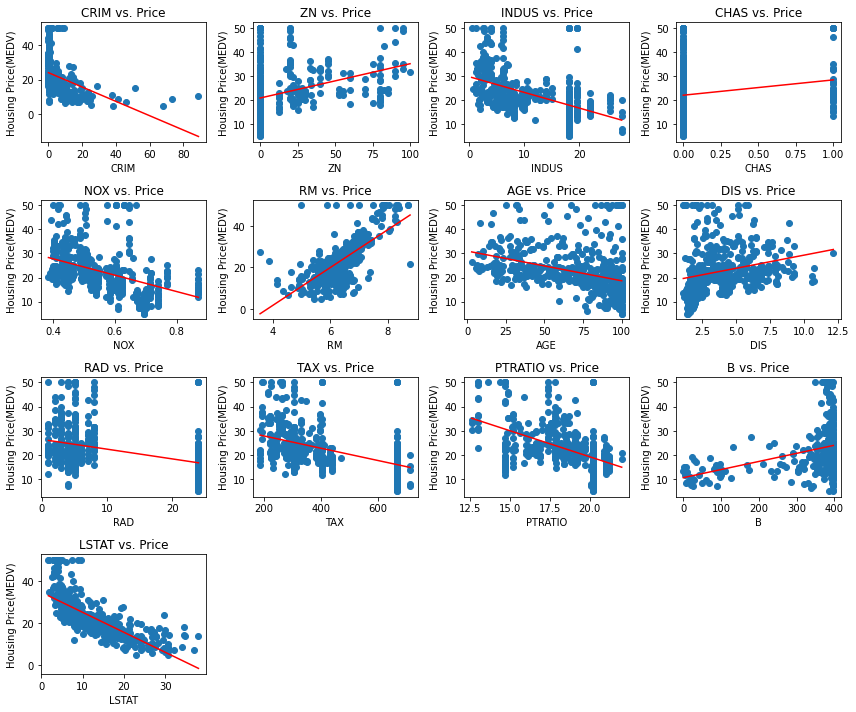

In [122]:
plt.figure(figsize = (12, 10))
for i in range(0, 13):
    
    X[i] = X[boston.feature_names[i]]
    plt.subplot(4,4,i+1)
    plt.scatter(X[i], y)
    plt.xlabel(str(boston.feature_names[i]))
    plt.ylabel("Housing Price(MEDV)")
    title = str(boston.feature_names[i]) + " vs. Price"
                                     
    plt.title(title)

    z1, res1, _, _, _= np.polyfit(X[i], y, 1, full = True)
    p1 = np.poly1d(z1)
#     print('z1:', z1)
#     print('p1:', p1)
#     print('residuals:', res1)

    xp = np.linspace(min(X[i]), max(X[i]), 100)
    plt.plot(xp, p1(xp), c='r')
    plt.tight_layout()
plt.show()

In [130]:
# compare residuals

plt.figure(figsize = (12, 10))
for i in range(0, 13):
    
    X[i] = X[boston.feature_names[i]]

    title = str(boston.feature_names[i]) + " vs. Price"

    z1, res1, _, _, _= np.polyfit(X[i], y, 1, full = True)
    p1 = np.poly1d(z1)
#     print('z1:', z1)

    print(title)
    print(p1)
    print('residuals:', res1)
    print()

CRIM vs. Price
 
-0.4152 x + 24.03
residuals: [36275.51235628]

ZN vs. Price
 
0.1421 x + 20.92
residuals: [37166.55822395]

INDUS vs. Price
 
-0.6485 x + 29.75
residuals: [32721.10815038]

CHAS vs. Price
 
6.346 x + 22.09
residuals: [41404.21614437]

NOX vs. Price
 
-33.92 x + 41.35
residuals: [34916.16990784]

RM vs. Price
 
9.102 x - 34.67
residuals: [22061.87919621]

AGE vs. Price
 
-0.1232 x + 30.98
residuals: [36646.53435007]

DIS vs. Price
 
1.092 x + 18.39
residuals: [40048.04884255]

RAD vs. Price
 
-0.4031 x + 26.38
residuals: [36495.15481166]

TAX vs. Price
 
-0.02557 x + 32.97
residuals: [33338.96132044]

PTRATIO vs. Price
 
-2.157 x + 62.34
residuals: [31702.01320697]

B vs. Price
 
0.03359 x + 10.55
residuals: [37966.409179]

LSTAT vs. Price
 
-0.95 x + 34.55
residuals: [19472.38141833]



<Figure size 864x720 with 0 Axes>

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423]


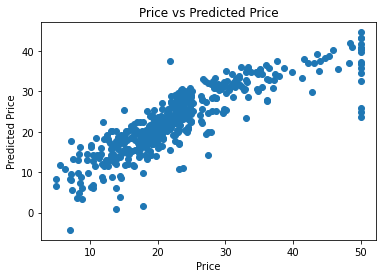

In [132]:
# depic "Price vs Predicted Price" predicted by 13 variables

lm = LinearRegression()
lm.fit(X, y)

predicted_price = lm.predict(X)
print(predicted_price[0:5])

plt.scatter(y, predicted_price)
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.title("Price vs Predicted Price")
plt.show()

## Practice

- plot "Price vs Predicted Price" predicted by every variable

## 4.3 Training & testing data

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.33, random_state=5)

- test_size = 0.33   
    - training data:67%, test data: 33%
- random_state=5    
    - random seed number

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


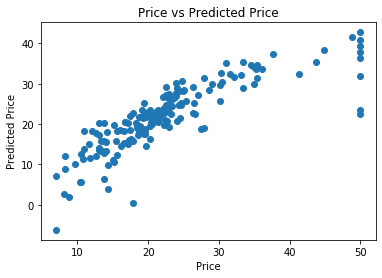

In [ ]:
# ch15_3_3
# Price vs Predicted Price in test dataset

import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

boston = datasets.load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
target = pd.DataFrame(boston.target, columns=["MEDV"])
y = target["MEDV"]


XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.33,
                                                random_state=5)
lm = LinearRegression()
lm.fit(XTrain, yTrain)

pred_test = lm.predict(XTest)

plt.scatter(yTest, pred_test)
plt.xlabel("Price")
plt.ylabel("Predicted Price")
plt.title("Price vs Predicted Price")
plt.show()

# 5. Accuracy & Performance

### Performance of Prediction in Regression 

- MSE(Mean Squared Error)
    - residual (the sum of the squared errors) / n
    - (y - predicted_y) ** 2加總 / n
    - smaller is better
    - mean_squared_error(y, predicted_y)  
        - from sklearn.metrics import mean_squared_error
    
- R<sup>2</sup>: R-squared (Cofficient of Determination) 
    - A statistical measure that determines the proportion of variance in the dependent variable that can be explained by the independent variable
    - R<sup>2</sup> = 1 - unexplained variation / total variation
        - R<sup>2</sup> = 1 - SSE/SST
    - value: 0 ~ 1
    - biger is better
    - LinerRegression_object.score()
    
    

In [140]:
# MSE & R-squared of training & testing data from 13 variables of boston dataset


import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

boston = datasets.load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
target = pd.DataFrame(boston.target, columns=["MEDV"])
y = target["MEDV"]

XTrain, XTest, yTrain, yTest = train_test_split(X, y, test_size=0.33,
                                                random_state=5)
lm = LinearRegression()
lm.fit(XTrain, yTrain)

pred_train = lm.predict(XTrain)
pred_test = lm.predict(XTest)

MSE_train = np.mean((yTrain-pred_train)**2)  # sum(y - predicted_y) ** 2 / n
MSE_test = np.mean((yTest-pred_test)**2)
print("MSE of Training data:", MSE_train)
print("MSE of Testing data:", MSE_test)

print("R-squared of Training data:", lm.score(XTrain, yTrain))
print("R-squared of Testing data:", lm.score(XTest, yTest))



MSE of Training data: 19.54675847353467
MSE of Testing data: 28.530458765974686
R-squared of Training data: 0.7551332741779998
R-squared of Testing data: 0.6956551656111596


In [ ]:
# MSE & R-squared of entire data from 13 variables of boston dataset

import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression

boston = datasets.load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
target = pd.DataFrame(boston.target, columns=["MEDV"])
y = target["MEDV"]

lm = LinearRegression()
lm.fit(X, y)

predicted_price = lm.predict(X)
print(predicted_price[0:5])

MSE = np.mean((y-predicted_price)**2)
print("MSE:", MSE)
print("R-squared:", lm.score(X, y))

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423]
MSE: 21.894831181729213
R-squared: 0.7406426641094095


In [ ]:
# MSE & R-squared of entire data from 13 variables of boston dataset
# call mean_squared_error method

import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

boston = datasets.load_boston()

X = pd.DataFrame(boston.data, columns=boston.feature_names)
target = pd.DataFrame(boston.target, columns=["MEDV"])
y = target["MEDV"]

lm = LinearRegression()
lm.fit(X, y)

predicted_price = lm.predict(X)
print(predicted_price[0:5])

MSE = np.mean((y-predicted_price)**2)

MSE2 = mean_squared_error(y, predicted_price)
print("MSE:", MSE)
print("MSE(use mean_squared_error):", MSE2)
print("R-squared:", lm.score(X, y))

[30.00384338 25.02556238 30.56759672 28.60703649 27.94352423]
MSE: 21.894831181729213
MSE(use mean_squared_error): 21.894831181729202
R-squared: 0.7406426641094095


##  Other reference


- 陳允傑（2018）。Python資料科學與人工智慧應用實務。台北：旗標。 ch.13, 15
- 邱皓政 量化研究法二
- 施威銘研究室（2020)。跨領域學Python 資料科學基礎養成。台北。旗標。